In [1]:
!pip install scvi-tools
!pip install scanpy

     |████████████████████████████████| 262 kB 4.2 MB/s 
     |████████████████████████████████| 140 kB 46.2 MB/s 
     |████████████████████████████████| 229 kB 49.1 MB/s 
     |████████████████████████████████| 398 kB 35.5 MB/s 
     |████████████████████████████████| 184 kB 54.1 MB/s 
     |████████████████████████████████| 718 kB 44.0 MB/s 
     |████████████████████████████████| 527 kB 29.1 MB/s 
     |████████████████████████████████| 283 kB 54.3 MB/s 
     |████████████████████████████████| 96 kB 4.7 MB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
     |████████████████████████████████| 952 kB 42.1 MB/s 
     |████████████████████████████████| 136 kB 54.3 MB/s 
     |████████████████████████████████| 829 kB 47.4 MB/s 
     |████████████████████████████████| 596 kB 46.9 MB/s 
     |████████████████████████████████| 1.1 MB 39.7 MB/s 
     |████████████████████████████████| 51 kB 6.6 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |███████████████

     |████████████████████████████████| 2.0 MB 4.1 MB/s 
     |████████████████████████████████| 11.2 MB 33.9 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 900 kB 33.9 MB/s 
     |████████████████████████████████| 1.1 MB 39.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=971510655ee942a37af291eb2402a803cefbae32e434a88d25bf94770062fc1e
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=ee81b24e9f60cbc2001b7d2bfaa04a00473686ea8d2f71a5989e2ea4c281c407
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=b7895b5e2918ebc8fcf64e3f8467

In [1]:
!pip install torch==1.10.0

     |██████████████████████████████▎ | 834.1 MB 1.4 MB/s eta 0:00:35tcmalloc: large alloc 1147494400 bytes == 0x56074080a000 @  0x7fa1a372e615 0x5607068d517c 0x5607069b547a 0x5607068d7f9d 0x5607069c9d4d 0x56070694bec8 0x560706946a2e 0x5607068d988a 0x56070694bd30 0x560706946a2e 0x5607068d988a 0x560706948719 0x5607069cab76 0x560706947d95 0x5607069cab76 0x560706947d95 0x5607069cab76 0x560706947d95 0x5607068d9ce9 0x56070691d579 0x5607068d8902 0x56070694bc4d 0x560706946a2e 0x5607068d988a 0x560706948719 0x560706946a2e 0x5607068d988a 0x5607069478f6 0x5607068d97aa 0x560706947b4f 0x560706946a2e
     |████████████████████████████████| 881.9 MB 19 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyro-ppl 1.8.1 require

In [2]:
!pip install scikit-misc

     |████████████████████████████████| 8.8 MB 3.8 MB/s 


In [3]:
!pip install anndata
import anndata as ad

In [4]:
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

from scvi.external import RNAStereoscope, SpatialStereoscope

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

Global seed set to 0


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
import pandas as pd
path = './gdrive/MyDrive/ST_Project/SimulatedData/'
Ann = sc.read_h5ad(path+'sc_simu.h5ad')


spatial_data_path = "st_simu.h5ad"
Ann_spatial = sc.read_h5ad(path+spatial_data_path)

In [28]:
annotations = Ann.obs["cell_type"]

In [13]:
'''to_be_removed=[]
for cell in Ann.obs_names:
  if annotations["Unnamed: 0"].isin([cell]).sum():
    continue
  else:
    to_be_removed.append(cell)
t=Ann.obs.drop(index for index in to_be_removed) 
Ann= Ann[Ann.obs["barcode"].isin(t["barcode"].to_list())]'''

'to_be_removed=[]\nfor cell in Ann.obs_names:\n  if annotations["Unnamed: 0"].isin([cell]).sum():\n    continue\n  else:\n    to_be_removed.append(cell)\nt=Ann.obs.drop(index for index in to_be_removed) \nAnn= Ann[Ann.obs["barcode"].isin(t["barcode"].to_list())]'

In [27]:
sc_adata=ad.AnnData(Ann.X)
st_adata=ad.AnnData(Ann_spatial.X)

AnnData object with n_obs × n_vars = 32000 × 2000
    obs: 'cell_type', '_scvi_labels'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid'
    layers: 'counts'

In [17]:
sc_adata.layers["counts"] = sc_adata.X.copy()
sc.pp.normalize_total(sc_adata, target_sum = 1e5)
sc.pp.log1p(sc_adata)
sc_adata.raw = sc_adata

In [ ]:
'''sc.pp.filter_cells(st_adata, min_counts = 500)
sc.pp.filter_cells(st_adata, min_genes = 500)
st_adata'''

AnnData object with n_obs × n_vars = 2976 × 31053
    obs: 'n_counts', 'n_genes'

In [29]:
mta=annotations.to_numpy()
sc_adata.obs["cell_type"]=mta


In [30]:
sc_adata.layers["counts"] = sc_adata.X.copy()
RNAStereoscope.setup_anndata(sc_adata, layer = "counts", labels_key = "cell_type")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [05:15<00:00,  3.15s/it, loss=3.27e+05, v_num=1]


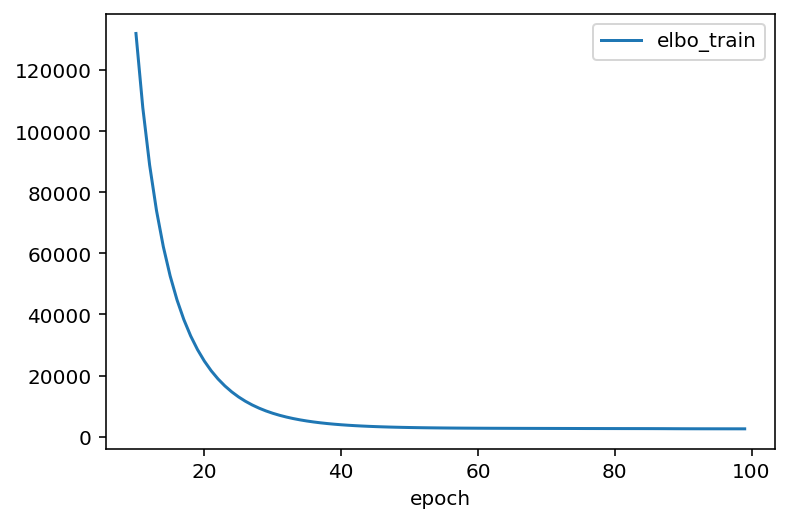

In [31]:
train = True
if train:
    sc_model = RNAStereoscope(sc_adata)
    sc_model.train(max_epochs = 100)
    sc_model.history["elbo_train"][10:].plot()
    sc_model.save("scmodel", overwrite=True)
else:
    sc_model = RNAStereoscope.load("scmodel", adata=sc_adata)
    print("Loaded RNA model from file!")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 2000/2000: 100%|██████████| 2000/2000 [05:15<00:00,  6.34it/s, loss=5.74e+06, v_num=1]


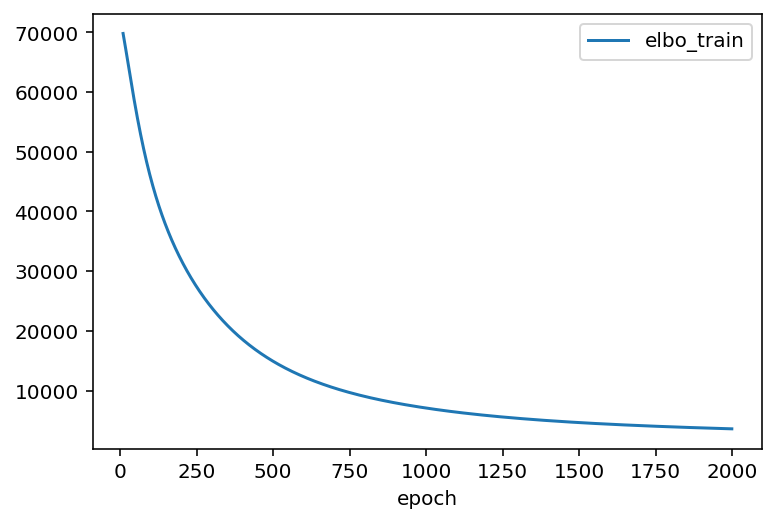

In [32]:
train=True
if train:
    spatial_model = SpatialStereoscope.from_rna_model(st_adata, sc_model)
    spatial_model.train(max_epochs = 2000)
    spatial_model.history["elbo_train"][10:].plot()
    spatial_model.save("stmodel", overwrite = True)
else:
    spatial_model = SpatialStereoscope.load("stmodel", adata=st_adata)
    print("Loaded Spatial model from file!")

In [33]:
spatial_model.get_proportions().to_csv("output3.csv")

In [34]:
ans=spatial_model.get_proportions()

In [37]:
Ann_spatial.obsm["cell_type"]

array([[0.10938242, 0.45854767, 0.24025539, 0.11788885, 0.07392568],
       [0.10637909, 0.54276707, 0.19206582, 0.0803757 , 0.07841232],
       [0.11555245, 0.58433519, 0.14847756, 0.06377525, 0.08785956],
       ...,
       [0.40169528, 0.19630891, 0.04633731, 0.03634987, 0.31930862],
       [0.47861387, 0.16290459, 0.03900442, 0.03063612, 0.288841  ],
       [0.55562348, 0.12328288, 0.03142873, 0.02744169, 0.26222321]])

In [38]:
ans

,0,1,2,3,4
0,0.021675,0.332139,0.328727,0.146072,0.171387
1,0.018396,0.351614,0.337154,0.066309,0.226527
2,0.050735,0.356445,0.337237,0.028020,0.227563
3,0.057591,0.369440,0.237568,0.076779,0.258622
4,0.184211,0.368140,0.115806,0.029098,0.302745
...,...,...,...,...,...
1595,0.115631,0.320877,0.147815,0.044947,0.370730
1596,0.298147,0.144145,0.038811,0.123953,0.394944
1597,0.350661,0.182386,0.014195,0.034948,0.417810
1598,0.475723,0.023632,0.000384,0.051153,0.449108
